# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:

#  Name: Idan Marzouk
#  Id: 208711028


# Details Student 2:

# NO

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install:
!pip install wn
!python -m wn download omw-he:1.4


Cached file found: C:\Users\IM159\.wn_data\downloads\7ecf10e89326bc0ac26ad94b40fe60a7b6ac3302

Checking C:\Users\IM159\AppData\Local\Temp\tmpf3lohg3d\omw-he\omw-he.xml
Skipping omw-he:1.4 (Hebrew Wordnet); already added



In [5]:
# word net import:

# unmark if you want to use:
import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
!pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:
import hebrew_tokenizer as ht

C:\Users\IM159


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [11]:
# Information:

df_train.describe(include = "all")
df_train.info()

,story,gender
count,753,753
unique,749,2
top,בשנה האחרונה נדבקתי וחליתי בנגיף הקורונה. עד ה...,m
freq,2,575


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   story   753 non-null    object
 1   gender  753 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [12]:
# Initialize an empty list to store cleaned text of the stories
# Loop through each story in the DataFrame:
#     1. Split every word and charactar to token using the Hebrew tokenizer.
#     2. Check if the token belongs to the 'HEBREW' group
#        2.1. If it is an hebrew word -> Join the Hebrew tokens to form the cleaned story for this iteration  
#    3. Append the cleaned story to the 'cleaned_stories' list
#    4. Update the 'story' column in the DataFrame with the cleaned stories


cleaned_stories = []
for story in df_train['story']:
    tokens = ht.tokenize(story)
    hebrew_tokens = []
    for token_info in tokens:
        token_group, token, _, _ = token_info
        if token_group == 'HEBREW':
            hebrew_tokens.append(token)
    cleaned_story = ' '.join(hebrew_tokens)
    cleaned_stories.append(cleaned_story)
    
df_train['story'] = cleaned_stories


In [13]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    df_train['story'],  # Input data (stories)
    df_train['gender'], # Labels (genders)
    test_size=0.15,     # 15% of data for testing
    random_state=42,    # Random seed for reproducibility
    shuffle=True        # Shuffle the data before splitting
)

In [14]:

# This code performs the last processing steps
# creates and fits the models using TF-IDF Vectorization and Count Vectorization
# prints out the results including the F1 scores for each class and the macro-average F1 score


# TF-IDF Vectorizer
TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

# Count Vectorizer
CV_Vectorizer = CountVectorizer(max_features=1000)
X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)




# KNN Model (K=5)
model = KNeighborsClassifier(n_neighbors=5)

# TF-IDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("TFIDF_Vectorizer + KNN(K=5):")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)

# Count Vectorizer
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("\nCountVectorizer + KNN(K=5):")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)
    
macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)


KNeighborsClassifier()

TFIDF_Vectorizer + KNN(K=5):


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


F1 Scores:
 {'m': 0.8379888268156425, 'f': 0.3829787234042554}
Average F1 Score: 0.6104837751099489


KNeighborsClassifier()


CountVectorizer + KNN(K=5):


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


F1 Scores:
 {'m': 0.8279569892473119, 'f': 0.19999999999999998}
Average F1 Score: 0.513978494623656


In [15]:

# This code performs the last processing steps
# creates and fits the models using TF-IDF Vectorization and Count Vectorization
# prints out the results including the F1 scores for each class and the macro-average F1 score

# TF-IDF Vectorizer
TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

# Count Vectorizer
CV_Vectorizer = CountVectorizer(max_features=1000)
X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

# Perceptron Model
model = Perceptron()

# TF-IDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("TFIDF_Vectorizer + Perceptron:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)

# Count Vectorizer
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("\nCountVectorizer + Perceptron:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)


Perceptron()

TFIDF_Vectorizer + Perceptron:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


F1 Scores:
 {'m': 0.8192771084337348, 'f': 0.5000000000000001}
Average F1 Score: 0.6596385542168675


Perceptron()


CountVectorizer + Perceptron:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


F1 Scores:
 {'m': 0.8491620111731844, 'f': 0.425531914893617}
Average F1 Score: 0.6373469630334007


In [16]:
# The code with the Linear Support Vector Classifier (LinearSVC) algorithm
# using both TF-IDF Vectorization and Count Vectorization
# It also calculates and prints the F1 scores for each class and the macro-average F1 score
# creates and fits the models using TF-IDF Vectorization and Count Vectorization
# prints out the results including the F1 scores for each class and the macro-average F1 score


# TF-IDF Vectorizer
TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

# Count Vectorizer
CV_Vectorizer = CountVectorizer(max_features=1000)
X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

# LinearSVC Model
model = LinearSVC()

# TF-IDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("TFIDF_Vectorizer + LinearSVC:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)

# Count Vectorizer
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("\nCountVectorizer + LinearSVC:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)


LinearSVC()

TFIDF_Vectorizer + LinearSVC:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


F1 Scores:
 {'m': 0.8587570621468926, 'f': 0.4897959183673469}
Average F1 Score: 0.6742764902571198


LinearSVC()


CountVectorizer + LinearSVC:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


F1 Scores:
 {'m': 0.8235294117647058, 'f': 0.46428571428571425}
Average F1 Score: 0.64390756302521


In [17]:
# The code performs the last processing steps
# creates and fits the models using MLPClassifier with hidden layers (100, 50)
# prints out the results including the F1 scores for each class and the macro-average F1 score


# TF-IDF Vectorizer
TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

# Count Vectorizer
CV_Vectorizer = CountVectorizer(max_features=1000)
X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

# MLP Classifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# TF-IDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("TFIDF_Vectorizer + MLPClassifier:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)

# Count Vectorizer
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("\nCountVectorizer + MLPClassifier:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

TFIDF_Vectorizer + MLPClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


F1 Scores:
 {'m': 0.857142857142857, 'f': 0.5098039215686274}
Average F1 Score: 0.6834733893557422


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)


CountVectorizer + MLPClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


F1 Scores:
 {'m': 0.8603351955307262, 'f': 0.4680851063829787}
Average F1 Score: 0.6642101509568524


In [18]:
# The code performs the last processing steps
# creates and fits the models using DecisionTreeClassifier
# prints out the results including the F1 scores for each class and the macro-average F1 score


# TF-IDF Vectorizer
TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

# Count Vectorizer
CV_Vectorizer = CountVectorizer(max_features=1000)
X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

# Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', random_state=42, splitter='best')

# TF-IDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("TFIDF_Vectorizer + DecisionTreeClassifier:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)

# Count Vectorizer
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("\nCountVectorizer + DecisionTreeClassifier:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)


DecisionTreeClassifier(random_state=42)

TFIDF_Vectorizer + DecisionTreeClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


F1 Scores:
 {'m': 0.7204968944099378, 'f': 0.3076923076923077}
Average F1 Score: 0.5140946010511227


DecisionTreeClassifier(random_state=42)


CountVectorizer + DecisionTreeClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,f,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,f,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


F1 Scores:
 {'m': 0.7375, 'f': 0.3636363636363636}
Average F1 Score: 0.5505681818181818


In [19]:
# The code performs the last processing steps
# creates and fits the models using the SGDClassifier algorithm for both TF-IDF Vectorization and Count Vectorization
# It prints the predictions, F1 scores for each class, and the macro-average F1 score

# TF-IDF Vectorizer
TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

# Count Vectorizer
CV_Vectorizer = CountVectorizer(max_features=1000)
X_train_CV = CV_Vectorizer.fit_transform(X_train)
X_test_CV = CV_Vectorizer.transform(X_test)

# SGD Classifier Model
model = SGDClassifier()

# TF-IDF
model.fit(X_train_TFIDF, y_train)
y_pred = model.predict(X_test_TFIDF)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("TFIDF_Vectorizer + SGDClassifier:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)

# Count Vectorizer
model.fit(X_train_CV, y_train)
y_pred = model.predict(X_test_CV)
df_prediction = pd.DataFrame({"story": X_test, "pred": y_pred, "actual": y_test})
print("\nCountVectorizer + SGDClassifier:")
df_prediction.head()

# Calculate F1 scores for each class and macro-average F1 score
f1_scores = {}
unique_classes = df_train['gender'].unique()
for class_name in unique_classes:
    class_true = (y_test == class_name).astype(int)
    class_pred = (y_pred == class_name).astype(int)
    f1_scores[class_name] = f1_score(class_true, class_pred)

macro_avg_f1 = sum(f1_scores.values()) / len(f1_scores)

print("F1 Scores:\n", f1_scores)
print("Average F1 Score:", macro_avg_f1)

SGDClassifier()

TFIDF_Vectorizer + SGDClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,f,f


F1 Scores:
 {'m': 0.8390804597701148, 'f': 0.4615384615384615}
Average F1 Score: 0.6503094606542882


SGDClassifier()


CountVectorizer + SGDClassifier:


,story,pred,actual
716,יום אחד במהלך חופשת חנוכה הלכנו כמה חברים לשחק...,m,m
651,לפני כחצי שנה עברתי לגור בצפון עם בת זוגתי עבר...,m,m
371,כשהתחילה הקורונה הלימודים עברו להיות רק בזום כ...,m,f
77,בשנה האחרונה עברתי דירה לעיר שיש בה ים כל חיי ...,m,f
212,לפני חצי שנה הייתי באיטליה עם המשפחה שלי זאת ה...,m,f


F1 Scores:
 {'m': 0.8554913294797688, 'f': 0.5283018867924528}
Average F1 Score: 0.6918966081361109


In [20]:
# Models scores:


# TFIDF_Vectorizer + KNN(K=5): 0.610
# CountVectorizer + KNN(K=5): 0.513
    
# TFIDF_Vectorizer + Perceptron: 0.659
# CountVectorizer + Perceptron: 0.637
    
# TFIDF_Vectorizer + LinearSVC: 0.674
# CountVectorizer + LinearSVC: 0.643
    
# TFIDF_Vectorizer + MLPClassifier: 0.683
# CountVectorizer + MLPClassifier: 0.664
    
# TFIDF_Vectorizer + DecisionTreeClassifier: 0.514  
# CountVectorizer + DecisionTreeClassifier: 0.550
    
# TFIDF_Vectorizer + SGDClassifier: 0.675
# CountVectorizer + SGDClassifier: 0.643



# The model with the highest f1-score is 'TTFIDF_Vectorizer + MLPClassifier'
# Average F1-score is = 68%.

In [21]:
# This is the code for predicting the 'df_test' data
# using the best model obtained earlier
# and updating the preprocessed stories for prediction

TFIDF_Vectorizer = TfidfVectorizer(max_features=1000)
X_train_TFIDF = TFIDF_Vectorizer.fit_transform(X_train)
X_test_TFIDF = TFIDF_Vectorizer.transform(X_test)

all_stories_test = []
for story in df_test['story']:
    tokens = ht.tokenize(story)
    hebrew_tokens = [token for grp, token, _, _ in tokens if grp == 'HEBREW']
    curr_story = ' '.join(hebrew_tokens)
    all_stories_test.append(curr_story)
df_test['story'] = all_stories_test

model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train_TFIDF, y_train)

y_test_tfidf = TFIDF_Vectorizer.transform(df_test.story)

y_predicted = model.predict(y_test_tfidf)

df_predicted = pd.DataFrame({"test_example_id": df_test.test_example_id, "predicted_category": y_predicted})
df_predicted.head()


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

,test_example_id,predicted_category
0,0,m
1,1,m
2,2,m
3,3,m
4,4,m


<Axes: >

<Axes: >

Text(0.5, 0, 'Gender Category')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Counts of Male and Female Labels')

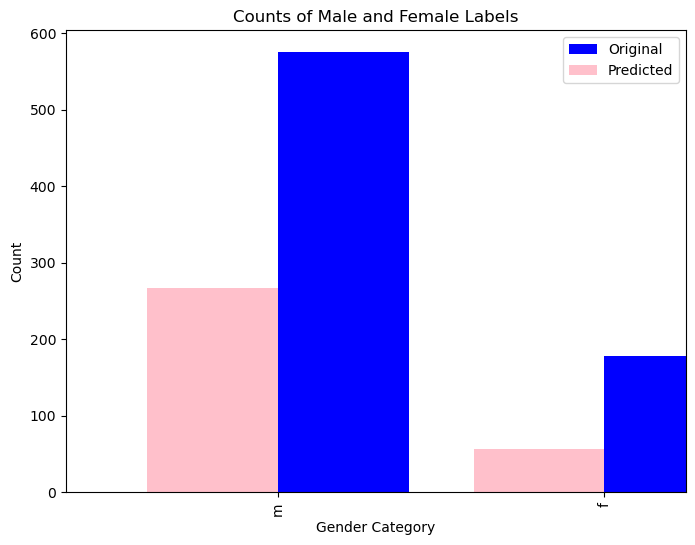

In [22]:
original_counts = df_train['gender'].value_counts()

predicted_counts = df_predicted['predicted_category'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
original_counts.plot(kind='bar',  position=0, color='blue', width=0.4, label='Original')
predicted_counts.plot(kind='bar', position=1, color='pink', width=0.4, label='Predicted')

ax.set_xlabel('Gender Category')
ax.set_ylabel('Count')
ax.set_title('Counts of Male and Female Labels')
ax.legend()

plt.show()


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [23]:
df_predicted.to_csv('classification_results.csv',index=False)